# An analysis and Machine Learning to regressing a Housing Prices

## Introduction
<br />
This is an analysis and regression for predicting a housing prices by data given. In this notebook will use step of Data Science Methodology from Data Preparation to Modeling and Evaluation.
<br /><br/>
This notebook is containing 6 topics<br />
<b>
1. Data Cleansing<br/>
2. Exploratory Data Analysis<br />
3. Feature Engineering<br />
4. Modeling<br/>
5. Evaluation<br/>
6. Conclusion</b>

## Data Preparation & Cleansing
First, I read the Data Description and Explore into csv data to view actual content in a files

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import seaborn as sns
from matplotlib import pyplot
import numpy as np
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

%matplotlib inline

In [2]:
train_data = pd.read_csv("./train.csv")

In [3]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

<b>As you see in table I will explain a bit of data definition, in data files that I obtained some category value has been assigned as 'NA' it's mean not have or no in data context, but pandas default 'NA' will interpret as 'NaN' value it's mean null.</b><br />
<br />
So, First step with this data I will checkout the truth 'NaN' in data set with no NA default for pandas and find real missing value first.

In [4]:
train_data_check = pd.read_csv("./train.csv", keep_default_na=False)
train_data_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

As you see in a information of data that made to check, there are no real missing value in dataset at begining.<br />
<br />
So, to dealing with 'NaN' that contain meaning in data description, I will fill it as "NA", but before filling a 'NA' into 'NaN' cell I have to define data in column is categorical or nominal data.
<br /> <b>First</b>, I will separate out string and numeric type. this is a easy way to define categorical or numerical data in first step.
<br /><br/>
I will define a NaN counter function to produce data frame to report NA value in dataset and 

In [5]:
def count_na(column_list=train_data.columns):
    na_counter = {}
    string_column = []
    for column_name in column_list:
        na_counter[column_name] = train_data[column_name].isna().sum()
        string_column.append(pd.api.types.is_string_dtype(train_data[column_name]))
    
    na_count_tab = pd.DataFrame.from_dict(na_counter, orient='index', columns=['NaN_count']).reset_index().rename(columns={'index':'column_name'})
    na_count_tab["string_column"] = string_column
    return na_count_tab


In [6]:
na_count_tab = count_na()
na_count_tab.head(10)

,column_name,NaN_count,string_column
0,Id,0,False
1,MSSubClass,0,False
2,MSZoning,0,True
3,LotFrontage,259,False
4,LotArea,0,False
5,Street,0,True
6,Alley,1369,True
7,LotShape,0,True
8,LandContour,0,True
9,Utilities,0,True


After separate a column, I gain a output as string column and non-string column. So the categorical data might be the most in form of string, I will deal with string data first. 

In [7]:
# DEALING WITH STRING COLUMN THAT CONTAINS NaN Value
na_count_tab[(na_count_tab.string_column == True)&(na_count_tab.NaN_count > 0)]


,column_name,NaN_count,string_column
6,Alley,1369,True
25,MasVnrType,8,True
30,BsmtQual,37,True
31,BsmtCond,37,True
32,BsmtExposure,38,True
33,BsmtFinType1,37,True
35,BsmtFinType2,38,True
42,Electrical,1,True
57,FireplaceQu,690,True
58,GarageType,81,True


After I got a NaN value counting in string data columns, next step I will fill 'NA' that define in data description.


In [8]:
train_data.loc[train_data.Alley.isna(),"Alley"] = 'NA'
train_data.loc[train_data.BsmtQual.isna(),"BsmtQual"] = 'NA'
train_data.loc[train_data.BsmtCond.isna(),"BsmtCond"] = 'NA'
train_data.loc[train_data.BsmtExposure.isna(),"BsmtExposure"] = 'NA'
train_data.loc[train_data.BsmtFinType1.isna(),"BsmtFinType1"] = 'NA'
train_data.loc[train_data.BsmtFinType2.isna(),"BsmtFinType2"] = 'NA'
train_data.loc[train_data.FireplaceQu.isna(),"FireplaceQu"] = 'NA'
train_data.loc[train_data.GarageType.isna(),"GarageType"] = 'NA'
train_data.loc[train_data.GarageFinish.isna(),"GarageFinish"] = 'NA'
train_data.loc[train_data.GarageQual.isna(),"GarageQual"] = 'NA'
train_data.loc[train_data.GarageCond.isna(),"GarageCond"] = 'NA'
train_data.loc[train_data.PoolQC.isna(),"PoolQC"] = 'NA'
train_data.loc[train_data.Fence.isna(),"Fence"] = 'NA'
train_data.loc[train_data.MiscFeature.isna(),"MiscFeature"] = 'NA'
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2

In [9]:
na_count_tab = count_na()
na_count_tab[(na_count_tab.NaN_count > 0)]

,column_name,NaN_count,string_column
3,LotFrontage,259,False
25,MasVnrType,8,True
26,MasVnrArea,8,False
42,Electrical,1,True
59,GarageYrBlt,81,False


After fill missing data with data description, so there're still missing data remain. So I will go back to data description again to look up a numerical data column.
<br/><br/>
So deal with Electrical column where's located NaN value just 1 row of data. I am able to terminate this row off from data.

In [10]:
train_data = train_data[~train_data["Electrical"].isna()]

In [11]:
na_count_tab = count_na()
na_count_tab[(na_count_tab.NaN_count > 0)]

,column_name,NaN_count,string_column
3,LotFrontage,259,False
25,MasVnrType,8,True
26,MasVnrArea,8,False
59,GarageYrBlt,81,False


After I terminated 1 data row of missing electrical type already.<br/>
I will go to check out a <b>LotFrontage</b> variable, it define as <b>"Linear feet of street connected to property"</b>, extract summary of data to determine a significant of data characteristic.

In [12]:
train_data["LotFrontage"].describe()

count    1200.000000
mean       70.047500
std        24.294727
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

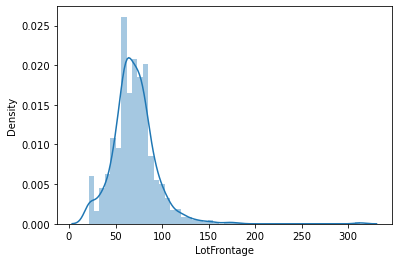

In [13]:
sns.distplot(train_data[~train_data.LotFrontage.isna()]["LotFrontage"])

I might able to put the mean of this data set into missing value of this column because there're 1 peak that observation should normally fall into.

In [14]:
train_data.loc[train_data["LotFrontage"].isna(), "LotFrontage"] = round(train_data["LotFrontage"].mean())

In [15]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,70.0,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,

In [16]:
na_count_tab = count_na()
na_count_tab[(na_count_tab.NaN_count > 0)]

,column_name,NaN_count,string_column
25,MasVnrType,8,True
26,MasVnrArea,8,False
59,GarageYrBlt,81,False


So I am done with LotFrontage value already. So next I will move to MasVnrType, <b>MasVnrType</b> define as <b>Masonry veneer type</b>, so it should relavant with <b>MasVnrArea</b> it mean <b>"Masonry veneer area in square feet"</b> so this 2 variable is different characteristic MasVnrType is presenting categorical data when MasVnrArea is presenting numerical data.<br />
To define the relative of this 2 variable.
<br/><br/>
First, let check a distribution of MasVnrArea

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

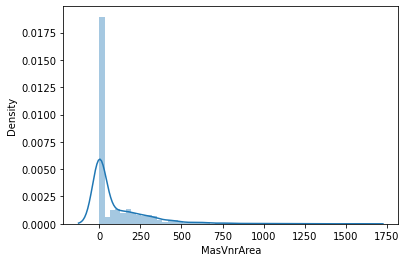

In [17]:
sns.distplot(train_data[~train_data["MasVnrArea"].isna()]["MasVnrArea"])

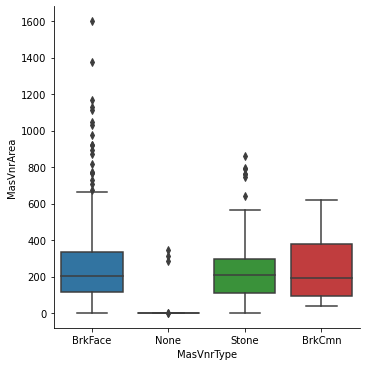

In [18]:
sns.catplot(x="MasVnrType", y="MasVnrArea", kind="box", data=train_data)

After I take a look at the boxplot, I got some weird data coming with outlier in "None" masonry type, that none mesonry must have 0 masonry area.

In [19]:
train_data[train_data["MasVnrType"]=="None"]["MasVnrArea"].describe()

count    863.000000
mean       1.096176
std       18.580390
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      344.000000
Name: MasVnrArea, dtype: float64

In [20]:
train_data[(train_data["MasVnrType"]=="None")&(train_data["MasVnrArea"]>0)][["MasVnrType","MasVnrArea","Exterior1st","Exterior2nd"]]

,MasVnrType,MasVnrArea,Exterior1st,Exterior2nd
624,None,288.0,VinylSd,VinylSd
773,None,1.0,Wd Sdng,Wd Sdng
1230,None,1.0,Plywood,Plywood
1300,None,344.0,VinylSd,VinylSd
1334,None,312.0,HdBoard,HdBoard


In [21]:
train_data.loc[(train_data["MasVnrType"]=="None")&(train_data["MasVnrArea"]>0), "MasVnrArea"] = 0

After defined data, I have to obtain a <b>mode</b> of this categorical data to fill a missing data into.

In [22]:
MasVnrArea_fill = pd.DataFrame(train_data["MasVnrType"].value_counts())
MasVnrArea_fill

,MasVnrType
None,863
BrkFace,445
Stone,128
BrkCmn,15


In [23]:
rep_word_MasVnrArea = MasVnrArea_fill[MasVnrArea_fill["MasVnrType"]==MasVnrArea_fill["MasVnrType"].max()].index[0]
rep_word_MasVnrArea

'None'

In [24]:
train_data.loc[train_data["MasVnrType"].isna(),"MasVnrType"] = rep_word_MasVnrArea

In [25]:
na_count_tab = count_na()
na_count_tab[(na_count_tab.NaN_count > 0)]

,column_name,NaN_count,string_column
26,MasVnrArea,8,False
59,GarageYrBlt,81,False


In [26]:
train_data.loc[train_data["MasVnrArea"].isna(),"MasVnrArea"] = train_data[(train_data["MasVnrType"]==rep_word_MasVnrArea)&(~train_data["MasVnrArea"].isna())]["MasVnrArea"].mean()

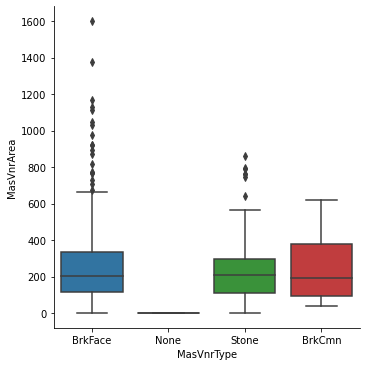

In [27]:
sns.catplot(x="MasVnrType", y="MasVnrArea", kind="box", data=train_data)

In [28]:
na_count_tab = count_na()
na_count_tab[(na_count_tab.NaN_count > 0)]

,column_name,NaN_count,string_column
59,GarageYrBlt,81,False


The last missing value column is <b>GarageYrBlt</b>, because of no garage so I will replace it with an average and round it to integer

In [29]:
train_data.loc[train_data["GarageYrBlt"].isna(),"GarageYrBlt"] = int(train_data[~train_data["GarageYrBlt"].isna()]["GarageYrBlt"].mean())

In [30]:
na_count_tab = count_na()
na_count_tab[(na_count_tab.NaN_count > 0)]

,column_name,NaN_count,string_column


In [31]:
train_data.reset_index(inplace=True)
train_data.drop('index',axis='columns',inplace=True)

## Exploratory Data Analysis

After we finish data preparation and cleaning, we will come to analyze data to explore data before doing some feature engineering on data.<br/>
### 'SalePrices'
So the target of prediction in this notebook is <b>SalePrice</b> then I will focusing at the distribution and statistic of SalePrice first.

In [32]:
train_data["SalePrice"].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

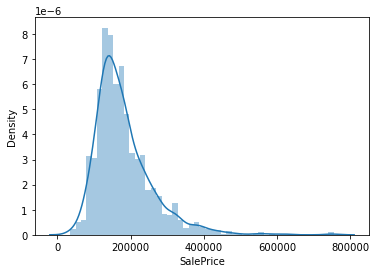

In [33]:
sns.distplot(train_data["SalePrice"])

With this visualization, the things what I can extract is<br/>
<ul>
    <li>The minimum sale prices is not equal to 0 or too less.</li>
    <li>The distribution seem not follow normal distribution.</li>
</ul>


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Johnson SU'}, xlabel='SalePrice'>

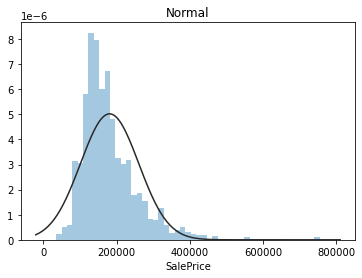

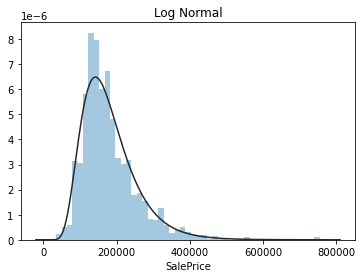

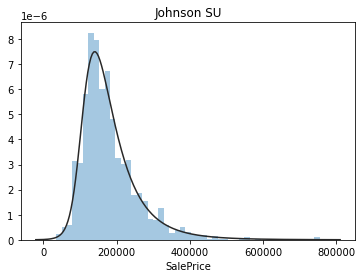

In [34]:
from scipy import stats as st

pyplot.figure(1); pyplot.title('Normal')
sns.distplot(train_data["SalePrice"], kde=False, fit=st.norm)
pyplot.figure(2); pyplot.title('Log Normal')
sns.distplot(train_data["SalePrice"], kde=False, fit=st.lognorm)
pyplot.figure(3); pyplot.title('Johnson SU')
sns.distplot(train_data["SalePrice"], kde=False, fit=st.johnsonsu)

I try to matching a distribution of SalePrice to a form of distribution, it match with the Johnson distribution so a SalePrice is a candidate to use Johnson Transformation.

After analyse the 'SalePrices' itself, then I will analyze a features.<br /><br />

I will analyze a correlation of SalePrice and Numerical feature. So first thing to do is define Numerical and Categorical data in dataset column. So this dataset I have data description, as description define I am able to extract 2 category of data. 

Refer to data description I am able to basically break data into 2 group Numerical such as area or value and Categorical such as number of room, number of car, ratings.

In [35]:
# "OverallQual", "OverallCond"

numerical_value_columns = ["LotFrontage", "LotArea", "MasVnrArea",
                      "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
                      "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
                      "LowQualFinSF", "GrLivArea",
                      "GarageArea", "WoodDeckSF", "OpenPorchSF", 
                      "EnclosedPorch","3SsnPorch", "ScreenPorch", 
                      "PoolArea", "MiscVal", "SalePrice"]
numerical_count_columns = ["GarageCars", "TotRmsAbvGrd", "Fireplaces"]
categorical_columns = list(set(train_data.columns) - (set(numerical_value_columns).union(set(numerical_count_columns))) )

### Numerical Data

After finished determine data type, let's analyze the charatoristic of each numerical data.

In [36]:
train_data[numerical_value_columns].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,70.039068,10517.363948,102.539411,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,180930.394791
std,22.031446,9984.666267,180.575741,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,79468.964025
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7549.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129950.000000
50%,70.000000,9477.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11603.000000,162.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-pac

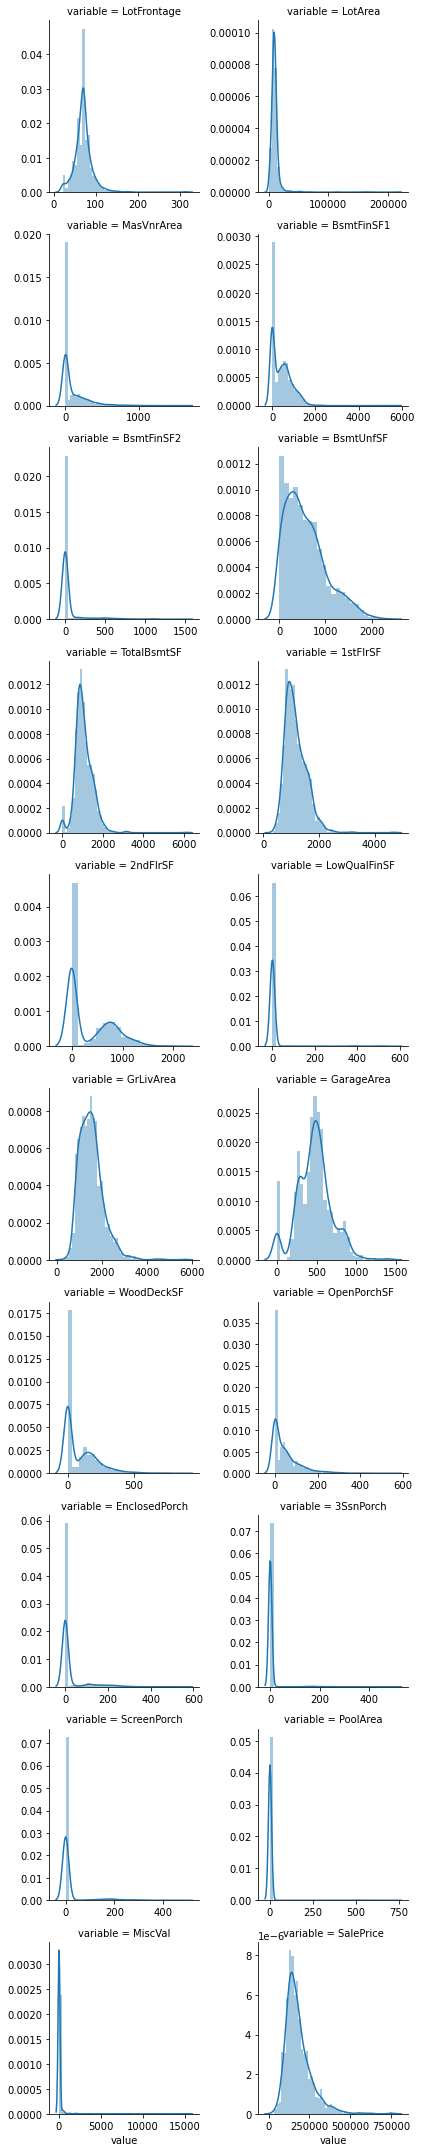

In [37]:
f = pd.melt(train_data, value_vars=numerical_value_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Most of numerical data are contain 0, so these numerical data can be transform with yeo-johnson by powertransformaer of scikit-learn

Analysis a correlation of Numerical value & count data

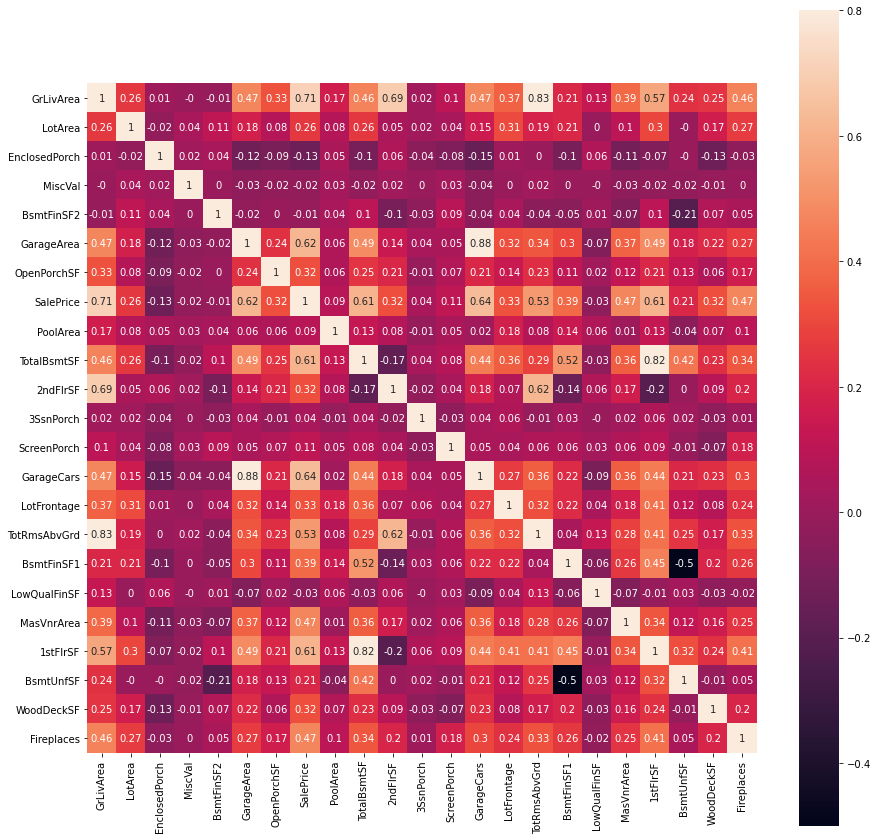

In [38]:
corr = train_data[list(set(numerical_count_columns).union(numerical_value_columns))].corr().round(2)
f, ax = pyplot.subplots(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, square=True, annot=True);

After analysis of correlation between numerical vs numerical, I focused on feature that having moderate-high correlation with label(SalePrice).
<ul>
    <li>BsmtFinSF1</li>
    <li>Fireplaces</li>
    <li>OpenPorceSF</li>
    <li>GrLivArea</li>
    <li>LotArea</li>
    <li>MasVnrArea</li>
    <li>LotFrontage</li>
    <li>BsmtUnfSF</li>
    <li>GarageArea</li>
    <li>TotalBsmtSF</li>
    <li>2ndFlrSF</li>
    <li>GarageCars</li>
    <li>TotRmsAbvGrd</li>
    <li>WoodDeckSF</li>
    <li>1stFlrSF</li>
</ul>

After analysis of correlation between Feature/Feature and Feature/Label on numerical features, Next things is analysis on category value with Label.<br />

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



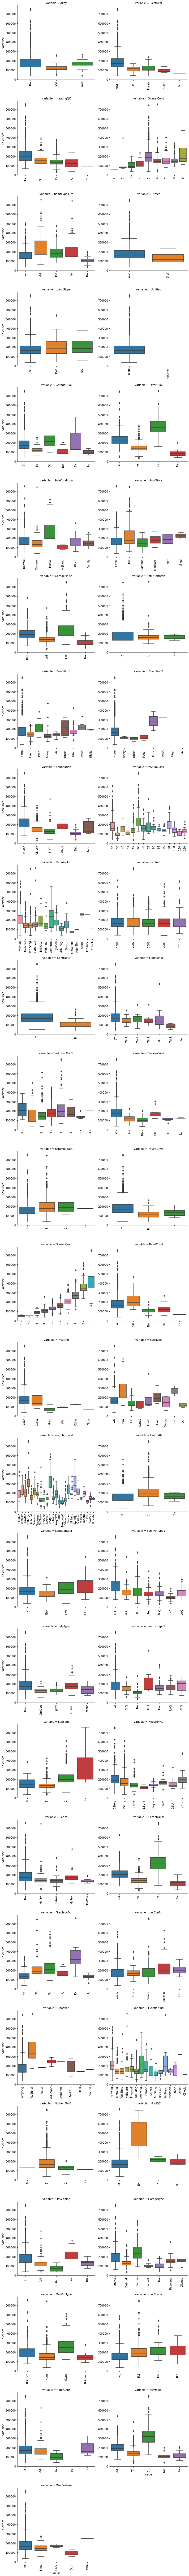

In [39]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=pyplot.xticks(rotation=90)
    
f = pd.melt(train_data, id_vars=['SalePrice'], value_vars=list(set(categorical_columns)-set(['Id','YearBuilt','YearRemodAdd','MoSold','GarageYrBlt'])))
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

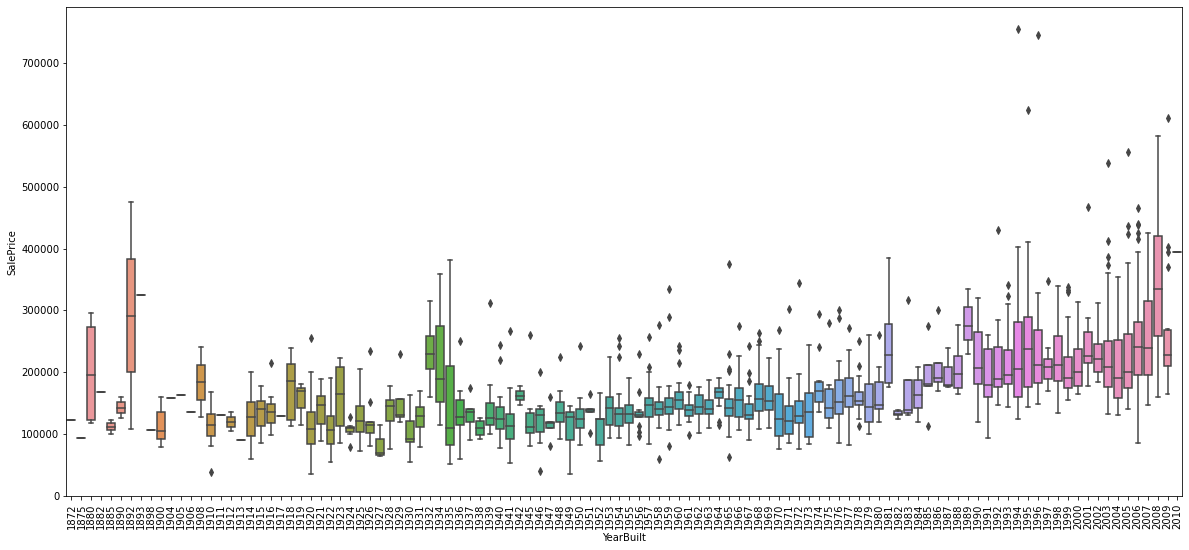

In [40]:
a4_dims = (20, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.boxplot(ax=ax, data=train_data, x="YearBuilt", y="SalePrice")
x=pyplot.xticks(rotation=90)

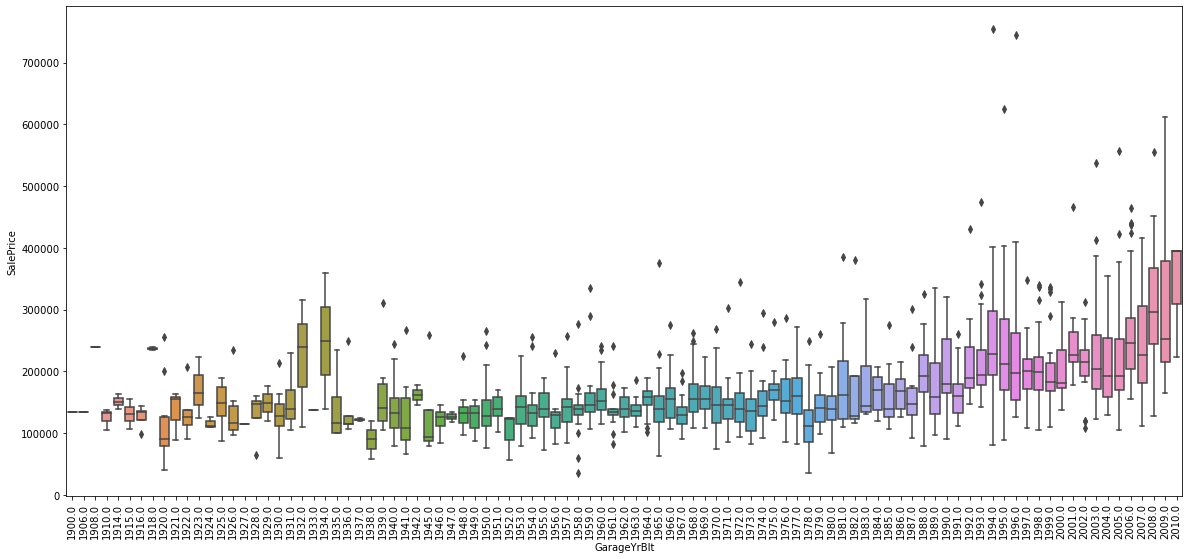

In [41]:
a4_dims = (20, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.boxplot(ax=ax, data=train_data, x="GarageYrBlt", y="SalePrice")
x=pyplot.xticks(rotation=90)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3620: F_onewayBadInputSizesWarning:

all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.

<ipython-input-42-904569f7c470>:20: RuntimeWarning:

divide by zero encountered in true_divide



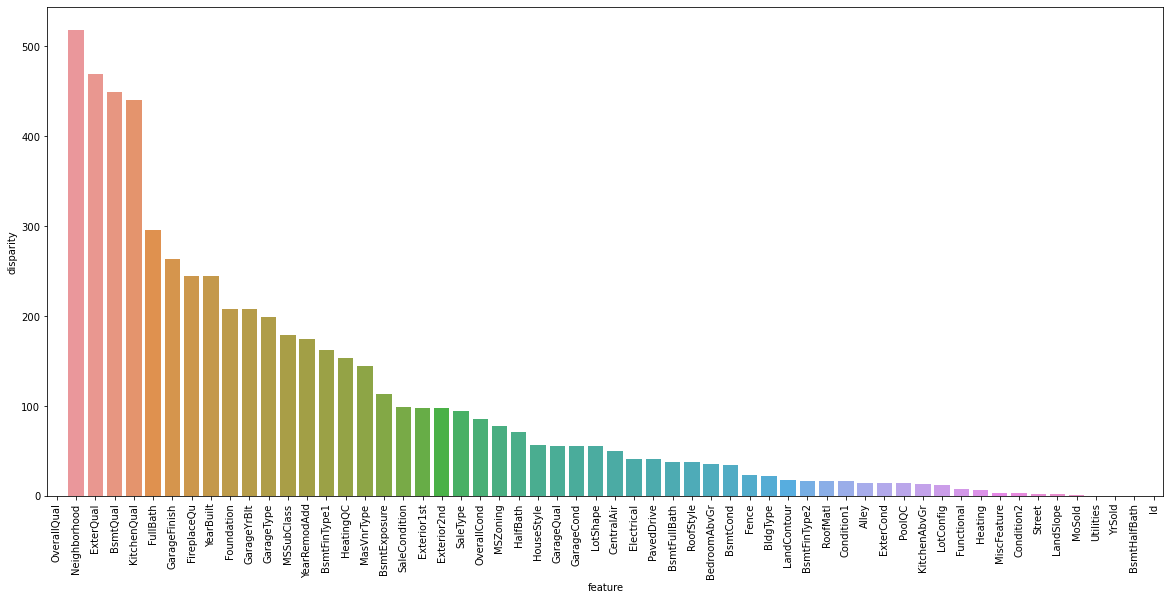

In [42]:
import scipy
from scipy import stats

def anova(frame, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a4_dims = (20, 9)
category_anova = anova(train_data, categorical_columns)
category_anova['disparity'] = np.log(1./category_anova['pval'].values)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data=category_anova, x='feature', y='disparity', ax=ax)
x=pyplot.xticks(rotation=90)

A graph showing which qualitative data that impacted to target. As I see Neighborhood having the most impact to SalePrice.<br />

### Categorical Features Encoding
After we did a exploratory data analysis on numerical features and some analysis with boxplot on categorical features.<br />
So, next step we will encode a categorical features before performing a <b>Baseline Model</b>.

In [43]:
lbl_name = 'SalePrice'

Create a name list for each variable type (numerical, time, ordinal, norminal, Time)

In [44]:
time = ['YearRemodAdd', 'YearBuilt', 'GarageYrBlt', 'YrSold', 'MoSold']

In [45]:
objFeatures = list(train_data.dtypes[train_data.dtypes == np.object].index)
qual_features = list(set(objFeatures).union(set(categorical_columns)))
qual_features = list(set(qual_features) - set(time))
print(qual_features)

['Alley', 'Electrical', 'HeatingQC', 'OverallCond', 'BsmtExposure', 'Street', 'LandSlope', 'Utilities', 'GarageQual', 'ExterQual', 'SaleCondition', 'RoofStyle', 'GarageFinish', 'BsmtHalfBath', 'Condition1', 'Condition2', 'Foundation', 'MSSubClass', 'Exterior1st', 'CentralAir', 'Functional', 'BedroomAbvGr', 'GarageCond', 'BsmtFullBath', 'BsmtCond', 'PavedDrive', 'Heating', 'OverallQual', 'SaleType', 'Neighborhood', 'HalfBath', 'LandContour', 'BsmtFinType1', 'Id', 'BldgType', 'BsmtFinType2', 'FullBath', 'HouseStyle', 'Fence', 'KitchenQual', 'FireplaceQu', 'LotConfig', 'RoofMatl', 'Exterior2nd', 'KitchenAbvGr', 'PoolQC', 'MSZoning', 'GarageType', 'MasVnrType', 'LotShape', 'ExterCond', 'BsmtQual', 'MiscFeature']


In [46]:
quan_features = list(set(train_data.columns) - (set(qual_features).union(set(time)).union(set([lbl_name])).union({'id'})))

First, I have to clarify a feature that might be Ordinal variable in our qualitative feature, qualitative feature that appended high disparity to label could transform and encode to ordinal.<br />
<br />
So, to encode those variable I will define function to encode by order the highest means of each category's SalePrices.

In [47]:
class QualitativeFeatureOrdinalEncoder:
    
    def __init__(self):
        self.feature_dict = {}
        self.featureCount = 0

    def fit(self, data, features, label):
        for feature in features:
            ordering = pd.DataFrame()
            ordering['val'] = data[feature].unique()
            ordering.index = ordering['val']
            ordering['spmean'] = data[[feature, label]].groupby(feature).mean()[label]
            ordering = ordering.sort_values('spmean')
            ordering['ordering'] = range(1, ordering.shape[0]+1)
            self.feature_dict[feature] = ordering[['val', 'ordering']]
            self.featureCount = self.featureCount + 1
        
    def show_model(self):
        return self.feature_dict
        
    def transform(self, frame):
        if self.featureCount==0:
            raise exception()
        ret_df = frame.copy()
        for feature in frame.columns:
            for cat, integ in zip(self.feature_dict[feature]['val'], self.feature_dict[feature]['ordering']):
                ret_df.loc[ret_df[feature] == cat, feature] = integ
        return ret_df


In [48]:
qfo = QualitativeFeatureOrdinalEncoder()
qfo.fit(train_data, qual_features, lbl_name)

In [49]:
ord_qual_data = qfo.transform(train_data[qual_features])

In [50]:
train_data_T = train_data.copy()

In [51]:
train_data_T[qual_features] = ord_qual_data

## Feature Engineering
Build baseline model with simple Linear Regression and use cross validation score and MSE score to determine model quality

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

baseline_mdl_feature = train_data_T[set(train_data.columns) - set([lbl_name, 'id'])]
baseline_mdl_label = train_data_T[lbl_name]

def baseline_model_evaluation(feature=baseline_mdl_feature, label=baseline_mdl_label):
    lr = LinearRegression()
    lr_score = cross_val_score(lr, feature, label, cv=10)
    lr_mse = cross_val_score(lr, feature, label, cv=10, scoring='neg_mean_squared_error')
    
    print("Accuracy Score : ",lr_score)
    print("      Avg Accuracy Score : ", lr_score.mean())
    print("STDDIV of Accuracy Score : ", lr_score.std())
    print()
    print("Mean Squared Error : ", lr_mse)
    print("           Avg MSE : ", lr_mse.mean())
    print("        STDDIV MSE : ", lr_mse.std())
    
baseline_model_evaluation()

Accuracy Score :  [0.88530273 0.83417881 0.88306731 0.76726774 0.86266972 0.84134023
 0.8140275  0.83910293 0.50386187 0.77160869]
      Avg Accuracy Score :  0.8002427536915476
STDDIV of Accuracy Score :  0.10596315972844284

Mean Squared Error :  [-5.32059906e+08 -1.04834765e+09 -7.34287878e+08 -1.59695291e+09
 -1.27107603e+09 -9.35230863e+08 -9.56461076e+08 -8.02627289e+08
 -4.01155565e+09 -1.20459015e+09]
           Avg MSE :  -1309318938.8558812
        STDDIV MSE :  944528057.0547105


Next our label and features of our dataset is not distributed normally as I analysed in EDA parts, there're no negative numerical in our data but having too much 0 so it can be transfrom with Johnson transformation.

In [54]:
numerical_features = list(set(quan_features) - set([lbl_name]))
merged_baseline_model_data = baseline_mdl_feature[numerical_features].join(baseline_mdl_label)
merged_baseline_model_data.head()

,PoolArea,TotalBsmtSF,GrLivArea,LotArea,EnclosedPorch,2ndFlrSF,3SsnPorch,ScreenPorch,GarageCars,LotFrontage,MiscVal,TotRmsAbvGrd,BsmtFinSF1,BsmtFinSF2,LowQualFinSF,GarageArea,MasVnrArea,1stFlrSF,BsmtUnfSF,OpenPorchSF,WoodDeckSF,Fireplaces,SalePrice
0,0,856,1710,8450,0,854,0,0,2,65.0,0,8,706,0,0,548,196.0,856,150,61,0,0,208500
1,0,1262,1262,9600,0,0,0,0,2,80.0,0,6,978,0,0,460,0.0,1262,284,0,298,1,181500
2,0,920,1786,11250,0,866,0,0,2,68.0,0,6,486,0,0,608,162.0,920,434,42,0,1,223500
3,0,756,1717,9550,272,756,0,0,3,60.0,0,7,216,0,0,642,0.0,961,540,35,0,1,140000
4,0,1145,2198,14260,0,1053,0,0,3,84.0,0,9,655,0,0,836,350.0,1145,490,84,192,1,250000


In [55]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
pt.fit(merged_baseline_model_data)

PowerTransformer()

In [56]:
merged_baseline_model_data_T = pt.transform(merged_baseline_model_data)

In [57]:
merged_baseline_model_data[merged_baseline_model_data.columns] = merged_baseline_model_data_T

In [58]:
baseline_mdl_label_T = merged_baseline_model_data[lbl_name]
baseline_mdl_feature_T = baseline_mdl_feature[baseline_mdl_feature.columns]
baseline_mdl_feature_T[numerical_features] = merged_baseline_model_data.drop([lbl_name],axis=1)

In [59]:
baseline_mdl_feature_T.head()

,Alley,Electrical,HeatingQC,YearBuilt,LotArea,Street,EnclosedPorch,GarageQual,MiscVal,BsmtHalfBath,GarageYrBlt,Foundation,MSSubClass,YrSold,CentralAir,Functional,BedroomAbvGr,OpenPorchSF,GarageCond,YearRemodAdd,BsmtFullBath,PavedDrive,BsmtCond,Heating,HalfBath,BsmtFinType1,BldgType,2ndFlrSF,3SsnPorch,HouseStyle,Fence,GarageCars,BsmtFinSF1,LowQualFinSF,RoofMatl,Exterior2nd,1stFlrSF,BsmtUnfSF,MSZoning,WoodDeckSF,LotShape,ExterCond,Fireplaces,BsmtQual,OverallCond,GrLivArea,BsmtExposure,LandSlope,Utilities,ExterQual,SaleCondition,GarageFinish,RoofStyle,Condition1,BsmtFinSF2,GarageArea,Condition2,Exterior1st,OverallQual,PoolArea,TotalBsmtSF,SaleType,Neighborhood,Id,BsmtFinType2,FullBath,ScreenPorch,TotRmsAbvGrd,KitchenQual,FireplaceQu,LotConfig,MasVnrArea,KitchenAbvGr,PoolQC,GarageType,MasVnrType,LotFrontage,MoSold,LandContour,MiscFeature
0,3,5,5,2003,-0.141017,2,-0.407758,4,-0.192245,3,2003.0,6,15,2008,2,7,5,0.840926,6,2003,3,3,4,6,3,7,5,1.171048,-0.129324,7,5,0.274027,0.796840,-0.134699,3,13,-0.800649,-0.887367,4,-0.949689,1,4,-1.027977,4,8,0.528275,2,1,2,3,5,3,2,5,-0.359523,0.383594,5,12,7,-0.069433,-0.405457,5,17,1071,6,4,-0.293894,0.946383,3,2,1,1.236064,4,1,6,3,-0.155768,2,2,4
1,3,5,5,1976,0.105680,2,-0.407758,4,-0.192245,2,1976.0,3,12,2007,2,7,5,-1.072000,6,1976,3,3,4,6,2,5,5,-0.870768,-0.129324,6,5,0.274027,1.011188,-0.134699,3,6,0.428227,-0.434323,4,1.213907,1,4,0.783038,4,6,-0.382705,5,1,2,2,5,3,2,3,-0.359523,-0.004778,5,5,6,-0.069433,0.507319,5,21,1280,6,4,-0.293894,-0.234184,2,4,2,-0.814638,4,1,6,2,0.537108,5,2,4
2,3,5,5,2001,0.413686,2,-0.407758,4,-0.192245,3,2001.0,6,15,2008,2,7,5,0.667357,6,2002,3,3,4,6,3,7,5,1.173697,-0.129324,7,5,0.274027,0.570244,-0.134699,3,13,-0.569584,-0.048151,4,-0.949689,2,4,0.783038,4,8,0.658815,3,1,2,3,5,3,2,5,-0.359523,0.641597,5,12,7,-0.069433,-0.255128,5,17,1135,6,4,-0.293894,-0.234184,3,4,1,1.199684,4,1,6,3,-0.010469,9,2,4
3,3,5,4,1915,0.095564,2,2.455671,4,-0.192245,3,1998.0,2,10,2006,2,7,5,0.583362,6,1970,3,3,5,6,2,5,5,1.147704,-0.129324,7,5,1.759103,0.140627,-0.134699,3,9,-0.430485,0.183186,4,-0.949689,2,4,0.783038,3,8,0.540537,2,1,2,2,2,2,2,5,-0.359523,0.785650,5,6,7,-0.069433,-0.646368,5,18,496,6,1,-0.293894,0.390170,3,5,3,-0.814638,4,1,3,2,-0.406612,2,2,4
4,3,5,5,2000,0.876927,2,-0.407758,4,-0.192245,3,2000.0,6,15,2008,2,7,7,0.991211,6,2000,3,3,4,6,3,7,5,1.210331,-0.129324,7,5,1.759103,0.749761,-0.134699,3,13,0.123693,0.077373,4,1.080188,2,4,0.783038,4,8,1.282416,4,1,2,3,5,3,2,5,-0.359523,1.582537,5,12,8,-0.069433,0.253361,5,25,1236,6,4,-0.293894,1.448336,3,4,2,1.336969,4,1,6,3,0.709168,12,2,4


In [60]:
baseline_model_evaluation(label=baseline_mdl_label_T, feature=baseline_mdl_feature_T)

Accuracy Score :  [0.8898457  0.92479039 0.92186938 0.85709815 0.90775624 0.87844989
 0.87249578 0.90972896 0.72483138 0.86103156]
      Avg Accuracy Score :  0.87478974422903
STDDIV of Accuracy Score :  0.055008386944841274

Mean Squared Error :  [-0.09943736 -0.07165163 -0.08849549 -0.16366469 -0.11857082 -0.09702959
 -0.12273598 -0.07864811 -0.2377609  -0.14318103]
           Avg MSE :  -0.12211755962176525
        STDDIV MSE :  0.04718773553581901
